### 머신러닝 프로젝트-1조

- 목적 : 강아지 사진에 알맞은 품종을 할당(분류)하는 대회 
https://www.kaggle.com/c/dog-breed-identification




### Deep learning Flow 
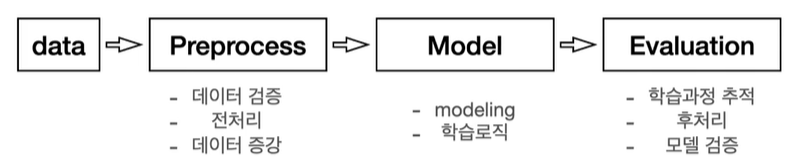

프로젝트 작업 순서 및 담당업무 

1. 데이터 읽어오기 
2. 데이터 전처리 
3. 모델 설계 
4. 모델 컴파일 
5. 학습 
6. 검증 


### colab MY Drive 연결 

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')
#drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


### Tensorflow 와 Torch 설정

In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf


import torch

from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### !nvidia GPU 상태 확인

In [2]:
!nvidia-smi

Tue Oct 25 15:07:03 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 512.96       Driver Version: 512.96       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
|  0%   38C    P5    23W / 220W |   1098MiB /  8192MiB |     33%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### 1. 데이터 읽어오기 

In [3]:
label = pd.read_csv("labels.csv")
label.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [4]:
filePath = 'train/'
f = lambda x: filePath + x + '.jpg'

label['imgpath'] = label['id'].apply(f)

In [5]:
label.head(20)

,id,breed,imgpath
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull,train/000bec180eb18c7604dcecc8fe0dba07.jpg
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo,train/001513dfcb2ffafc82cccf4d8bbaba97.jpg
2,001cdf01b096e06d78e9e5112d419397,pekinese,train/001cdf01b096e06d78e9e5112d419397.jpg
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick,train/00214f311d5d2247d5dfe4fe24b2303d.jpg
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever,train/0021f9ceb3235effd7fcde7f7538ed62.jpg
5,002211c81b498ef88e1b40b9abf84e1d,bedlington_terrier,train/002211c81b498ef88e1b40b9abf84e1d.jpg
6,00290d3e1fdd27226ba27a8ce248ce85,bedlington_terrier,train/00290d3e1fdd27226ba27a8ce248ce85.jpg
7,002a283a315af96eaea0e28e7163b21b,borzoi,train/002a283a315af96eaea0e28e7163b21b.jpg
8,003df8b8a8b05244b1d920bb6cf451f9,basenji,train/003df8b8a8b05244b1d920bb6cf451f9.jpg
9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound,train/0042188c895a2f14ef64a918ed9c7b64.jpg


In [6]:
from keras.preprocessing.image import img_to_array,load_img,ImageDataGenerator

 # 이미지를 100*100 크기로 기져오기
img_data = load_img('test/0a0b97441050bba8e733506de4655ea1.jpg', target_size = (100, 100))
# 가져온후 array로 변환, shape을 통해 형태를 확인하면 3차원 형태이다.
img = img_to_array(img_data)
print(img.shape)

(100, 100, 3)


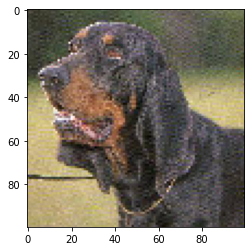

In [7]:
# 다음과 같이 100*100 크기의 사진으로 가져온다.
plt.imshow(img_data)
plt.show()

In [8]:
# 10*10 형태의 크기로 사진을 가져온 후 array로 변환 
ff = lambda x: img_to_array(load_img(x , target_size = (10, 10)))
# label의 imgArray에 저장한다.
label['imgArray'] = label['imgpath'].apply(ff)
label['imgArray'][0].shape

(10, 10, 3)

In [16]:
# label['breed'].value_counts().index
print(len(label['breed'].unique()))
label['breed'].unique()

120


array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'borzoi', 'basenji', 'scottish_deerhound',
       'shetland_sheepdog', 'walker_hound', 'maltese_dog',
       'norfolk_terrier', 'african_hunting_dog',
       'wire-haired_fox_terrier', 'redbone', 'lakeland_terrier', 'boxer',
       'doberman', 'otterhound', 'standard_schnauzer',
       'irish_water_spaniel', 'black-and-tan_coonhound', 'cairn',
       'affenpinscher', 'labrador_retriever', 'ibizan_hound',
       'english_setter', 'weimaraner', 'giant_schnauzer', 'groenendael',
       'dhole', 'toy_poodle', 'border_terrier', 'tibetan_terrier',
       'norwegian_elkhound', 'shih-tzu', 'irish_terrier', 'kuvasz',
       'german_shepherd', 'greater_swiss_mountain_dog', 'basset',
       'australian_terrier', 'schipperke', 'rhodesian_ridgeback',
       'irish_setter', 'appenzeller', 'bloodhound', 'samoyed',
       'miniature_schnauzer', 'brittany_spaniel', 'kelpie', 'papillon',
       'borde

### 2. 데이터 전처리 

In [17]:
label['imgArray'].value_counts

<bound method IndexOpsMixin.value_counts of 0        [[[67.0, 61.0, 29.0], [195.0, 191.0, 92.0], [1...
1        [[[112.0, 54.0, 16.0], [46.0, 24.0, 13.0], [74...
2        [[[83.0, 82.0, 80.0], [100.0, 99.0, 97.0], [10...
3        [[[42.0, 49.0, 42.0], [140.0, 141.0, 127.0], [...
4        [[[83.0, 83.0, 81.0], [87.0, 89.0, 86.0], [97....
                               ...                        
10217    [[[203.0, 204.0, 206.0], [206.0, 206.0, 206.0]...
10218    [[[161.0, 155.0, 157.0], [168.0, 162.0, 166.0]...
10219    [[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...
10220    [[[186.0, 181.0, 178.0], [187.0, 182.0, 179.0]...
10221    [[[210.0, 210.0, 210.0], [161.0, 161.0, 163.0]...
Name: imgArray, Length: 10222, dtype: object>

In [ ]:
# 한픽셀당 0~255의 값을 가짐으로 255로 나누어서 0~1의 값으로 정규화해준다.
X_train = label['imgArray'].values / 255

In [10]:
label.head()

,id,breed,imgpath,imgArray
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull,train/000bec180eb18c7604dcecc8fe0dba07.jpg,"[[[67.0, 61.0, 29.0], [195.0, 191.0, 92.0], [1..."
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo,train/001513dfcb2ffafc82cccf4d8bbaba97.jpg,"[[[112.0, 54.0, 16.0], [46.0, 24.0, 13.0], [74..."
2,001cdf01b096e06d78e9e5112d419397,pekinese,train/001cdf01b096e06d78e9e5112d419397.jpg,"[[[83.0, 82.0, 80.0], [100.0, 99.0, 97.0], [10..."
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick,train/00214f311d5d2247d5dfe4fe24b2303d.jpg,"[[[42.0, 49.0, 42.0], [140.0, 141.0, 127.0], [..."
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever,train/0021f9ceb3235effd7fcde7f7538ed62.jpg,"[[[83.0, 83.0, 81.0], [87.0, 89.0, 86.0], [97...."


In [14]:
# 품종명 라벨 인코딩, 0~119 까지 총 120종
le = LabelEncoder()
a = le.fit_transform(label['breed'])
print(a)
a.min(), a.max()


[19 37 85 ...  3 75 28]


(0, 119)

In [15]:
# 원핫 인코딩(파라미터 크기만큼의 0으로된 배열을 만들고 파라미터 값 위치에만 1을 넣어준다.)
Y_train = np_utils.to_categorical(a)
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.], dtype=float32)

### 3. 모델 설계 

### 4. 모델 컴파일 

### 5. 학습 

### 6. 검증